# Final Assessment Scratch Pad

## Instructions

1. Please use only this Jupyter notebook to work on your model, and **do not use any extra files**. If you need to define helper classes or functions, feel free to do so in this notebook.
2. This template is intended to be general, but it may not cover every use case. The sections are given so that it will be easier for us to grade your submission. If your specific use case isn't addressed, **you may add new Markdown or code blocks to this notebook**. However, please **don't delete any existing blocks**.
3. If you don't think a particular section of this template is necessary for your work, **you may skip it**. Be sure to explain clearly why you decided to do so.

## Report

##### Overview
https://chat.openai.com/share/ec6c6778-d7cc-48e2-98d1-24b7f6a6a769

##### 1. Descriptive Analysis
At the start, I *did* not read the main.ipynb and jumped straight into teh scratchpad to read the data directly. After fiddling with the data for about an hour, being confused about the variable n (6-10) x 16 x 16 images, I decided to read the main.ipynb fully. I then realised that the data was a list of videos. With that in mind, I decided to plot out the images. However, on first observation, I did not come to realise teh images as japanese characters. I only came to this understanding at 9.30PM on Sunday.

##### 2. Detection and Handling of Missing Values
There were quite a few NaNs for both the X and y values. Initially, I considered the y NaNs as a class of its own. On further reading of teh main file, I realised that the Nans were not a class, but rows to be removed. After filtering out the y values, there was still the X values to consider. Initially, to get a quick model out, I decided to zero out the values. In the end, I decided to replace the NaNs with the average of the frame. This was done by iterating through each frame, and replacing the NaNs with the average of the frame. This was done with the assistance of GPT for the code generation.

##### 3. Detection and Handling of Outliers
There were quite a few outliers in teh dataset, which strayed away from the general min and max of 0 and 255. To resolve this, I used the np.clip(X, 0, 255) to upper bound and lowerbound the values. I did some experimentation with trying to make the different values more distinct, but this was not successful. With some rudimentary code, I was able to improve the performance of teh detection, somewhat, but it was not very consistent. 

I decided to use equalize also, which should make the data more prominent. However, with the equalize method, I hit time limit, and was not able to use that. 

##### 4. Detection and Handling of Class Imbalance 
There was heavy class imbalance in the dataset. This was fixed with sampling the data. I used both upsampling and downsampling, where I upsampled data when it didn't hit the minimum I needed from each class, and downsampled data when it exceeded the maximum I needed from each class. 

##### 5. Understanding Relationship Between Variables
This analysis was not particularly done. Since I was processing it as images, I didn't plan to use dimentionality reduction techniques or other means. 


##### 6. Data Visualization
The data visualisation can be seen below. Generally, I used data visualisation to directly see the images, and also see the distribution of the classes. 

Visualization was also helpful in viewing the outliers, especially with boxplots. However, I didn't use visualiastions to inspect the model output. 
##### 7. General Preprocessing
The general preprocessing was done by reducing the data to 6 frames, and then processing the data to remove NaNs and clip the values. The data was then sampled to `600` elements, (which was obtained through hyperparameter optimisation). 
 
##### 8. Feature Selection 
NO feature selection and engineering was done, generally the entire dataset was used. NaN values were replaced by frame averages. 

##### 9. Feature Engineering
No featuer engineering was also done. 

##### 10. Creating Models
The model that I eventually came up with after a lot of experimentation is a 2 layer CNN. I had experimented with a CNN -> RNN, but that didn't work very well. The first model I had created was a 2D CNN, but I struggled with mapping the Videos to a stream of photos effectively. I then created a 1 layer conv3d model, and that gave me a solid result. I then experimented with the possible 2nd layers for the model. I first used LSTM, as I thought that since this was video data, it would be more effective. However, the LSTM model did not give good results. I am predicting this is due to bad hyperparameter optimisation. When I switched the 2nd layer to another 3D CNN, it worked quite well. Implementing batch normalization also improved the results greatly. 
##### 11. Model Evaluation
The model was evaludated using F1. I averaged out the results of 3 runs of the model with F1 before I decided to finalize this. 

##### 12. Hyperparameters Search
Optuna was used to search for hyperparameters. Learning this library was quite useful. However, I wasn't able to optimally implement this, due to large variances when running hte model multiple times. Figuring out how to take the average value of multiple runs for each parameter search would have been useful to find the most optimal parameters. I mainly used this to find parameters for lr, hidden layers and batch size. I wasn't able to use it optimally due to time constraints too. 

##### Conclusion
I spent way too long due to a bad understanding of a lot of concepts in AI. This exam helped me to learn a lot of stuff that we had used in class, but didn't fully understand. For example, in the psets, a lot of the code writing was very machanical. But this exam allowed us to be creative and problem solve. However, it would have been nicer if the duration was much shorter. 

The main aspects I struggled with was trying to figure out what to with the videos. The initial method of processing them as just images was not very effective. This was mainly due to my inability to code out a solution well. 

---

# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done. 

## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).

In [42]:
import pandas as pd
import os
import numpy as np

## Load Dataset

The dataset `data.npy` consists of $N$ grayscale videos and their corresponding labels. Each video has a shape of (L, H, W). L represents the length of the video, which may vary between videos. H and W represent the height and width, which are consistent across all videos. 

A code snippet that loads the data is provided below.

### Load Data

In [267]:
with open('data.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True).item()
    X = data['data']
    y = data['label']


print('Number of data sample:', len(X))
print('Shape of the first data sample:', X[0].shape)
print('Shape of the third data sample:', X[2].shape)

Number of data sample: 2500
Shape of the first data sample: (10, 16, 16)
Shape of the third data sample: (8, 16, 16)


## Data Exploration & Preparation

### 1. Descriptive Analysis

In [330]:
import matplotlib.pyplot as plt
import torch

def show_images(images, n_row=5, n_col=5, figsize=[12,12]):
    _, axs = plt.subplots(n_row, n_col, figsize=figsize)
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        ax.imshow(img, cmap='gray')
    plt.show()

torch.Size([6, 1, 16, 16])


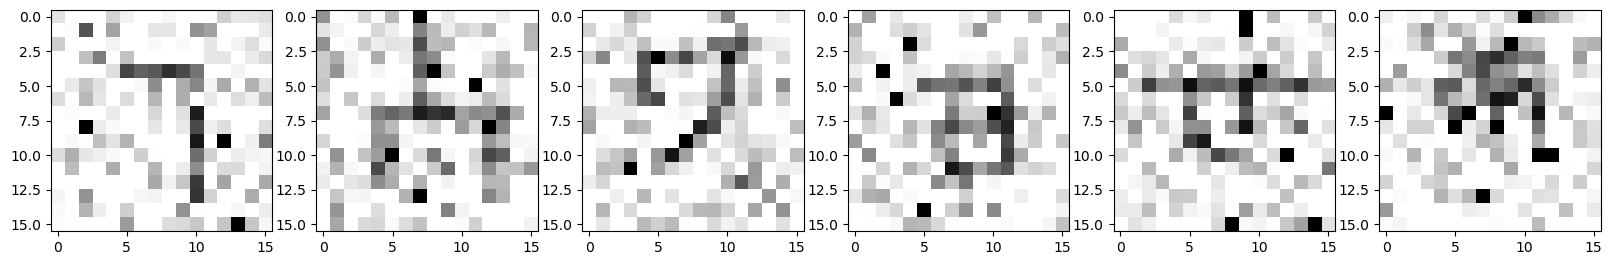

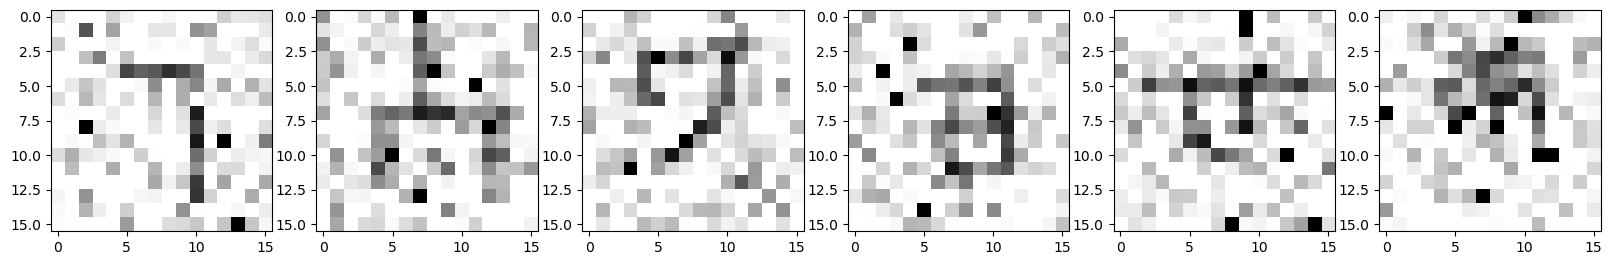

tensor([227, 255, 255, 255, 212, 242, 255, 255, 247, 255, 255, 255, 208, 231,
        230, 223], dtype=torch.uint8)
[227. 255. 255. 255. 212. 242. 255. 255. 247. 255. 255. 255. 208. 231.
 230. 223.]


In [338]:
# Remove NaN's from the input
import torchvision
not_nan_indices = np.argwhere(~np.isnan(np.array(y))).squeeze()
y = [y[i] for i in not_nan_indices]
X = [X[i] for i in not_nan_indices]
# Plot each image in a row
tmp = X[0][:6].copy()
# Set 255 to all values in X which are greater than 120
# Set 0 to all values in X which are less than 100

tmp = np.array(tmp)
tmp = np.nan_to_num(tmp, 0)
tmp = np.clip(tmp, 0, 255)
tensor = torch.Tensor(tmp)
tensor = tensor.to(torch.uint8).reshape(-1, 1, 16, 16)
print(tensor.shape)
tensor = torchvision.transforms.functional.equalize(tensor)
tensor = tensor.reshape(6, 16, 16)
# 100 all values less than 
show_images(tensor, n_row=1, n_col=6, figsize=[20, 20])
show_images(tmp, n_row=1, n_col=6, figsize=[20, 20])
print(tensor[0][0])
print(tmp[0][0])
# At 9.30PM on Sunday I've come to realies that this is japanese characters... A bit too late to figure that out...


In [294]:
print(y[:10]) # y is just a list of values

[1.0, 1.0, 4.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 0.0]


In [ ]:
pd.DataFrame(y).value_counts()
# From this, we know that we need to undersample or upsample the data. We will pick understampling as the data is quite large, and understampling will reduce the training time.

### 2. Detection and Handling of Missing Values

In [ ]:
np.isnan(X6).sum() # We know that there is quite a few NaNs in the data. However, I will not be figuring out which column / nan has this value. Instead we can just take the average of each image, adn use that as the input to the nan

### 3. Detection and Handling of Outliers

In [ ]:
# Check if there are outliers
# We can check if there are outliers by checking the max and min values of each video
np.max(X6, axis=3)
# From this we can see that there are values whic exceed 255, and thus, we can clip that.

### 4. Detection and Handling of Class Imbalance

In [83]:
# Handling Undersampling
pd.DataFrame(y).value_counts()
# There is a class imbalance, and we will need to undersample the data

0
0    300
1    300
2    300
3    300
4    300
5    300
Name: count, dtype: int64

### 5. Understanding Relationship Between Variables

### 6. Data Visualization

<Axes: >

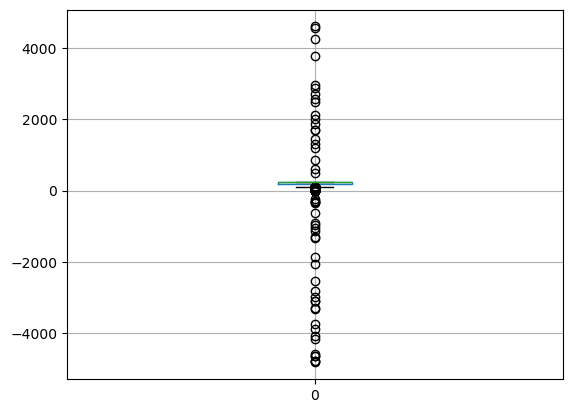

In [349]:
# Plot the values in all the images. 
# Flatten the image
data_to_plot = pd.DataFrame(X[0].reshape(-1))
data_to_plot.boxplot()



<Axes: xlabel='0'>

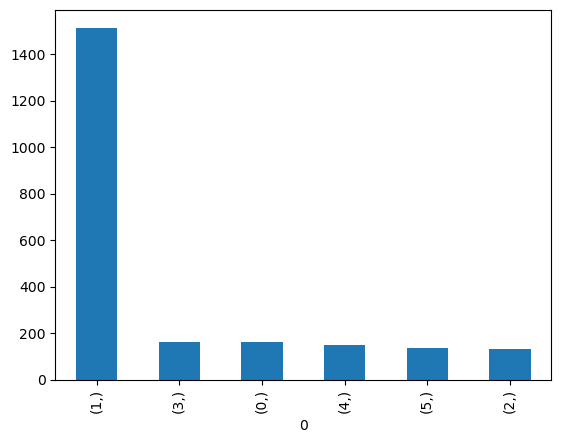

In [351]:
y_pd = pd.DataFrame(torch.tensor(y).int())
y_pd.value_counts().plot(kind='bar')

## Data Preprocessing

### 7. General Preprocessing

In [82]:
import torch

# Reduce the data to 6 frames
X = np.array([video[:6] for video in X])
tensor_videos = torch.tensor(X, dtype=torch.float32)
# Clip values to 0 and 255
tensor_videos = np.clip(tensor_videos, 0, 255)
# Replace NaNs in each frame, with the average of the frame. This was generated with GPT
for i in range(tensor_videos.shape[0]):
    for j in range(tensor_videos.shape[1]):
        tensor_videos[i][j][torch.isnan(tensor_videos[i][j])] = torch.mean(tensor_videos[i][j][~torch.isnan(tensor_videos[i][j])])
        
# Undersample the data for each of the 6 classes. Select max of 300 samples for each class
# Very much generated with the assitance of chatGPT with some modifications
# Get the indices of each class
indices = [np.argwhere(y == i).squeeze(1) for i in range(6)]
# Get the number of samples to take for each class
num_samples_to_take = 300
# Get the indices of the samples to take
indices_to_take = [np.random.choice(indices[i], num_samples_to_take, replace=True) for i in range(6)]
# Concatenate the indices
indices_to_take = np.concatenate(indices_to_take)
# Select the samples
tensor_videos = tensor_videos[indices_to_take]
y = y[indices_to_take]


torch.Size([1800, 6, 16, 16])
(1800,)
<class 'numpy.ndarray'>


In [85]:
# This is the extra channel dimention to work with the conv3d
tensor_videos = tensor_videos.unsqueeze(1)
tensor_videos.shape

torch.Size([1800, 1, 6, 16, 16])

### 8. Feature Selection

### 9. Feature Engineering

## Modeling & Evaluation

### 10. Creating models

In [238]:
from torch import nn
class CNN3D(nn.Module):
    def __init__(self):
        super(CNN3D, self).__init__()
        self.conv1 = nn.Conv3d(1, 12, 2, 1,2)
        self.mp = nn.AvgPool3d(2)
        self.relu = nn.LeakyReLU()
        self.fc1 = nn.Linear(3888, 6)
        self.flatten = nn.Flatten()
    def forward(self, x):
        x = self.conv1(x)
        x = self.mp(x)
        x = self.relu(x)
        
        # print(x.shape)
        
        x = x.view(-1, 3888)
        return x
    
def train(model, criterion, optimizer, loader, epochs = 10):
    for epoch in range(epochs):
        for idx, (inputs, labels) in enumerate(loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch}, Loss: {loss.item()}')
    return model
def process_X(X):
    X = np.array([video[:6] for video in X])
    tensor_videos = torch.tensor(X, dtype=torch.float32)
    # Clip values to 0 and 255
    tensor_videos = np.clip(tensor_videos, 0, 255)
    # Replace NaNs in each frame, with the average of the frame. This was generated with GPT
    for i in range(tensor_videos.shape[0]):
        for j in range(tensor_videos.shape[1]):
            tensor_videos[i][j][torch.isnan(tensor_videos[i][j])] = torch.mean(tensor_videos[i][j][~torch.isnan(tensor_videos[i][j])])
    return tensor_videos
    
def process_data(X, y):
    y = np.array(y)
    tensor_videos = process_X(X)
    # Undersample the data for each of the 6 classes. Select max of 300 samples for each class
    # Very much generated with the assitance of chatGPT with some modifications
    # Get the indices of each class
    indices = [np.argwhere(y == i).squeeze(1) for i in range(6)]
    # Get the number of samples to take for each class
    num_samples_to_take = 300
    # Get the indices of the samples to take
    indices_to_take = [np.random.choice(indices[i], num_samples_to_take, replace=True) for i in range(6)]
    # Concatenate the indices
    indices_to_take = np.concatenate(indices_to_take)
    # Select the samples
    tensor_videos = tensor_videos[indices_to_take].unsqueeze(1)
    y = y[indices_to_take]
    return torch.Tensor(tensor_videos), torch.Tensor(y).long()
class Model():
    def __init__(self):
        self.model = CNN3D()
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)
    def fit(self, X, y):
        X, y = process_data(X, y)
        train_dataset = torch.utils.data.TensorDataset(X, y)
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
        train(self.model, self.criterion, self.optimizer, train_loader)
    def predict(self, X):
        self.model.eval()

        X = np.array([video[:6] for video in X])
        tensor_videos = torch.tensor(X, dtype=torch.float32)
        # Clip values to 0 and 255
        tensor_videos = np.clip(tensor_videos, 0, 255)
        # Replace NaNs in each frame, with the average of the frame. This was generated with GPT
        for i in range(tensor_videos.shape[0]):
            for j in range(tensor_videos.shape[1]):
                tensor_videos[i][j][torch.isnan(tensor_videos[i][j])] = torch.mean(tensor_videos[i][j][~torch.isnan(tensor_videos[i][j])])
        X = torch.Tensor(tensor_videos.unsqueeze(1))
        return np.argmax(self.model(X).detach().numpy(), axis=1)


### 11. Model Evaluation

In [239]:
from sklearn.model_selection import train_test_split

with open('data.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True).item()
    X = data['data']
    y = data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

not_nan_indices = np.argwhere(~np.isnan(np.array(y_test))).squeeze()
y_test = [y_test[i] for i in not_nan_indices]
X_test = [X_test[i] for i in not_nan_indices]



In [241]:
model = Model()
model.fit(X_train, y_train)

from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
print("F1 Score (macro): {0:.2f}".format(f1_score(y_test, y_pred, average='macro'))) # You may encounter errors, you are expected to figure out what's the issue.


Epoch 0, Loss: 85.83575439453125
Epoch 1, Loss: 43.13077926635742
Epoch 2, Loss: 13.879751205444336
Epoch 3, Loss: 3.084989070892334
Epoch 4, Loss: 5.557327747344971
Epoch 5, Loss: 3.1260528564453125
Epoch 6, Loss: 3.4430527687072754
Epoch 7, Loss: 5.166628837585449
Epoch 8, Loss: 4.4976654052734375
Epoch 9, Loss: 5.530020236968994
F1 Score (macro): 0.02


F1 Score (macro): 0.60


### 12. Hyperparameters Search

In [ ]:
def objective(trial):
    batch = trial.suggest_int("batch_size", 1, 12, log=True)
    epochs = trial.suggest_int("epochs", 1, 20)
    model = Model(batch_size=2**batch, epochs=epochs)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return -f1_score(y_test, pred, average='macro')
# Run optimization
# storage = optuna.storages.InMemoryStorage()
# study = optuna.create_study(storage=storage)
# study.optimize(objective, n_trials=10)
# 
# best_score = study.best_value
# best_params = study.best_params
# 
# print(best_score, best_params)


In [ ]:
import numpy as np
import torch
import os

from torch import nn

with open('data.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True).item()
    X = data['data']
    y = data['label']

from torch import nn
from sklearn.model_selection import train_test_split

from torch import nn
import numpy as np
import torch
import os
from torchvision.transforms.functional import equalize

class CNN3D(nn.Module):
    def __init__(self, hidden_size=32, dropout=0.0):
        super(CNN3D, self).__init__()
        self.conv1 = nn.Conv3d(1, hidden_size, kernel_size=3, stride=1, padding=1)
        self.batchnorm = nn.BatchNorm3d(hidden_size)
        self.conv2 = nn.Conv3d(hidden_size, hidden_size*2, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool3d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(hidden_size*32, 256)  # Calculate input size based on output from conv3
        self.fc2 = nn.Linear(256, 6)
        # self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.batchnorm(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        # x = self.dropout(x)

        x = x.view(x.size(0), -1)  # Flatten features for fully connected layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def train(model, criterion, optimizer, loader, epochs=5):
    for epoch in range(epochs):
        for idx, (inputs, labels) in enumerate(loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch}, Loss: {loss.item()}')
    return model

class Model():
    def __init__(self, batch_size=64,lr=0.001,epochs=10, dropout=0.0, hidden_size=32, n_samples=900):
        print(batch_size, epochs, lr, dropout, hidden_size, n_samples)
        self.batch_size = batch_size
        self.lr = lr
        self.epochs = epochs
        self.model = CNN3D(dropout=dropout, hidden_size=hidden_size)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)
        self.n_samples = n_samples

    def fit(self, X, y):
        X, y = self.process_data(X, y)
        train_dataset = torch.utils.data.TensorDataset(X, y)
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        train(self.model, self.criterion, self.optimizer, train_loader, self.epochs)

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X = np.array([video[:6] for video in X])
            tensor_videos = torch.tensor(X, dtype=torch.float32)
            # Clip values to 0 and 255
            tensor_videos = np.clip(tensor_videos, 0, 255)

            # Replace NaNs in each frame, with the average of the frame. This was generated with GPT
            for i in range(tensor_videos.shape[0]):
                for j in range(tensor_videos.shape[1]):
                    tensor_videos[i][j][torch.isnan(tensor_videos[i][j])] = torch.mean(
                        tensor_videos[i][j][~torch.isnan(tensor_videos[i][j])])
            # tensor_videos = torch.Tensor(tensor_videos).to(torch.uint8).reshape(-1, 1, 16, 16)
            # tensor_videos = equalize(tensor_videos).float().reshape(-1, 1, 6, 16, 16)
            tensor_videos = torch.Tensor(tensor_videos).reshape(-1, 1, 6, 16, 16)
            # some funky code to make the features more prominent

            result = self.model(tensor_videos)
        return torch.max(result, dim=1)[1].numpy()
    def process_data(self, X, y):
        y = np.array(y)
        X = np.array([video[:6] for video in X])
        tensor_videos = torch.tensor(X, dtype=torch.float32)
        # Clip values to 0 and 255
        tensor_videos = np.clip(tensor_videos, 0, 255)

        # Replace NaNs in each frame, with the average of the frame. This was generated with GPT
        for i in range(tensor_videos.shape[0]):
            for j in range(tensor_videos.shape[1]):
                tensor_videos[i][j][torch.isnan(tensor_videos[i][j])] = torch.mean(
                    tensor_videos[i][j][~torch.isnan(tensor_videos[i][j])])
        # Undersample the data for each of the 6 classes. Select max of 300 samples for each class
        # Very much generated with the assitance of chatGPT with some modifications
        # Get the indices of each class
        indices = [np.argwhere(y == i).squeeze(1) for i in range(6)]
        # Get the number of samples to take for each class
        # Get the indices of the samples to take
        indices_to_take = [np.random.choice(indices[i], self.n_samples, replace=True) for i in range(6)]
        # Concatenate the indices
        indices_to_take = np.concatenate(indices_to_take)
        # Select the samples
        tensor_videos = tensor_videos[indices_to_take]

        tensor_videos = torch.Tensor(tensor_videos).reshape(-1, 1, 6, 16, 16)
        # Reshape the tensor to int for image processing
        # tensor_videos = torch.Tensor(tensor_videos).to(torch.uint8).reshape(-1, 1, 16, 16)
        # tensor_videos = equalize(tensor_videos).float().reshape(-1, 1, 6, 16, 16)

        y = y[indices_to_take]
        return tensor_videos, torch.Tensor(y).long()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

not_nan_indices = np.argwhere(~np.isnan(np.array(y_test))).squeeze()
y_test = [y_test[i] for i in not_nan_indices]
X_test = [X_test[i] for i in not_nan_indices]

print("init model")
model = Model()
model.fit(X_train, y_train)

from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
print("F1 Score (macro): {0:.2f}".format(f1_score(y_test, y_pred, average='macro'))) # You may encounter errors, you are expected to figure out what's the issue.